In [13]:
import matplotlib.pyplot             # For plotting circuits
from qiskit import BasicAer, IBMQ    # Simulator and access to the quantum chips
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister    # For creating programs
from qiskit import execute    # For running the programs
from qiskit.providers.ibmq import least_busy
from qiskit import *
from qiskit.visualization import plot_histogram 

El problema a resolver es dilucidar si los distintos oráculos propuestos están basados en funciones balanceadas o constantes. Utilizad lo aprendido en la parte teórica para implementar el algoritmo de Deutsch-Josza. Los oráculos son los siguientes: 

In [38]:
'''Las siguientes funciones defininen dos oráculo. El primero implementa una función de 1 bit y el segundo y
el tercero una de 3 bits.
Inputs: 
quantum_register - registro cuántico sobre el que implementar el oraculo. El qubit auxiliar 
                   siempre debe ir en última posición. '''


''' Oráculo sobre funciones de 1 bit'''
def oracle1(quantum_register):  
    n = 3
    O1 = QuantumCircuit(quantum_register)
    O1.cx(quantum_register[0], quantum_register[n])
    return O1

''' Oráculos sobre funciones de 3 bits'''
def oracle2(quantum_register):
## |x>|y> -> |x>|y+x0+x_1x_2>
    n = 3
    O2 = QuantumCircuit(quantum_register)
    O2.cx(quantum_register[0], quantum_register[n])
    O2.ccx(quantum_register[1], quantum_register[2], quantum_register[n])
    return O2
    

def oracle3(qr):
## |x>|y> -> |x>|y+x0x1+x0x2+x1x2>
    O3 = QuantumCircuit(qr)
    O3.ccx(qr[0], qr[1], qr[n])
    O3.ccx(qr[0], qr[2], qr[n])
    O3.ccx(qr[1], qr[2], qr[n])
    return O3

Pasos: 
- Crear el circuito necesario para implementar el oráculo.
- Sumar el oráculo a vuestro circuito.
- Aplicar el resto del algoritmo.
- Utilizar el qasm simulator para medir el circuito en la base $Z$.
- Implementar el algoritmo en un chip cuántico.

/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '
/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


Least busy backend:  ibmqx2


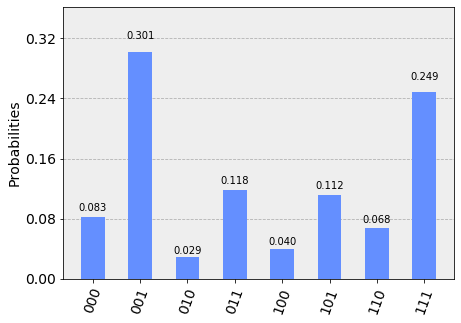

In [43]:
# PASOS DEL ALGORITMO



from qiskit import *
IBMQ.save_account('2052d42c515d6c72ccd0785184e1086d854b491f8116a234aa4f3ec78816acf81c4f67dd92f83c66fc0620ec27f751ea1bcbb9d6f51d727ea58f2cf3d5af53fa')
IBMQ.load_account()
provider = IBMQ.get_provider() 
backend_lb = providers.ibmq.least_busy(provider.backends(simulator=False))
print("Least busy backend: ", backend_lb)
# Solución
n = 3
quantum_reg = QuantumRegister(n+1)
classical_reg = ClassicalRegister(n)
dj_circuit = QuantumCircuit(quantum_reg,classical_reg,name='Deutsh-Jozsa')

# La ancilla tiene que estar en estado |1>
dj_circuit.x(n)

# Aplicar hadamar a todos los qbits
dj_circuit.h(0)
dj_circuit.h(1)
dj_circuit.h(2)
dj_circuit.h(3)
# Aplicar el oráculo
dj_circuit = dj_circuit + oracle2(quantum_reg)

# Aplicar hadamar a todas menos a la ancilla
dj_circuit.h(0)
dj_circuit.h(1)
dj_circuit.h(2)

# Ahora medimos el circuito
dj_circuit.measure(0,0)
dj_circuit.measure(1,1)
dj_circuit.measure(2,2)

    
circuito = dj_circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuito,backend_lb,shots = 1000)
result = job.result()
counts = result.get_counts(circuito)
plot_histogram(counts)



# Este código está bien, solo puede dar 
#Todas son balanceadas porque no dan en ninguna el resultado es de 1 al con la combinación |000>

# En el caso de oracle2, ningún resultado es 000, así que podemos decir que nunca nunca será contante la función. 
# Nunca saldrá 000 en el caso de nuestro simulador, pero puede darse el caso que sí en el chip cuántico salga 000, pero con una probabilidad menor. Eso es debido al ruido presente en los chips
# Esto es un problema, hay que aplicar un threshold de error admitible para discernir si hemos acertado o no. 




Oráculos de 3 qubits

In [ ]:
# Solución